# Convolutional Neural Network Rock Paper Scissors Classification

*In this project...*

## Load RPS Dataset
This dataset was created by ... and added to his blog at...

In [1]:
# importing libraries

%tensorflow_version 1.x
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
import zipfile

TensorFlow 1.x selected.


In [2]:
# loading data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-08-12 22:51:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  58.6MB/s    in 3.3s    

2020-08-12 22:51:51 (58.6 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-08-12 22:51:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/

In [3]:
# loading data into memory

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
# putting imnages into their own directories

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('Checking that pictures are correctly loaded into their directories:\n\n'+
      'total training rock images:', str(len(os.listdir(rock_dir)))+
      '\ntotal training paper images:', str(len(os.listdir(paper_dir)))+
      '\ntotal training scissors images:', str(len(os.listdir(scissors_dir))))

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)
print('\n'+str(rock_files[:5])+
      '\n'+str(paper_files[:5])+
      '\n'+str(scissors_files[:5]))

Checking that pictures are correctly loaded into their directories:

total training rock images: 840
total training paper images: 840
total training scissors images: 840

['rock06ck02-105.png', 'rock07-k03-021.png', 'rock07-k03-083.png', 'rock07-k03-075.png', 'rock07-k03-064.png']
['paper03-085.png', 'paper03-041.png', 'paper04-007.png', 'paper07-119.png', 'paper07-069.png']
['testscissors02-038.png', 'testscissors01-055.png', 'scissors01-009.png', 'scissors02-020.png', 'testscissors02-061.png']


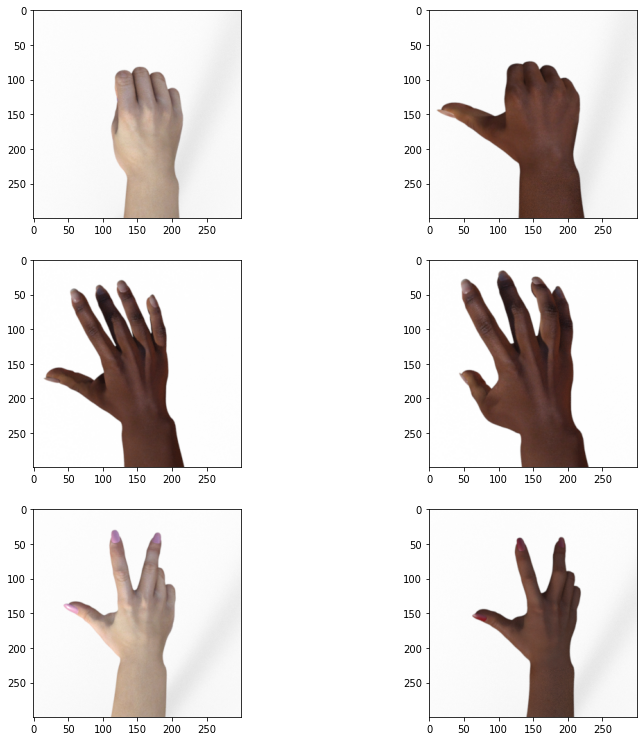

In [6]:
# showing example of images to give idea of how the gestures differ

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from pylab import *

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

img=[]
plt.figure(figsize=(13,13))

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img.append(mpimg.imread(img_path))
  plt.subplot(3,2,i+1)
  imshow(img[i])\

##Fully Connected Neural Network

*to be added...*

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/rps/')
test_dir = os.path.join('/tmp/rps-test-set/')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Using TensorFlow backend.


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
# creating model

from keras import layers
from keras import models
from keras import optimizers

nn_model = models.Sequential()
nn_model.add(layers.Dense(64, activation='relu', input_shape=(150,150,3)))
nn_model.add(layers.Dropout(0.5))
nn_model.add(layers.Dense(64, activation='relu'))
nn_model.add(layers.Dropout(0.5))
nn_model.add(layers.Flatten())
nn_model.add(layers.Dense(3, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['categorical_accuracy'])

nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150, 150, 64)      256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 150, 64)      0         
_________________________________________________________________
dense_2 (Dense)              (None, 150, 150, 64)      4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 150, 150, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1440000)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 4320003   
Total params: 4,324,419
Trainable params: 4,324,419
Non-trainable params: 0
____________________________________________

In [9]:
# training model

history = nn_model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs= 10,
    validation_data = validation_generator,
    validation_steps=50,
    verbose = 1)

Epoch 1/10
100/100 [==============================] - 12s 117ms/step - loss: 16.3606 - categorical_accuracy: 0.4800 - val_loss: 1.0982 - val_categorical_accuracy: 0.3435
Epoch 2/10
100/100 [==============================] - 10s 99ms/step - loss: 0.6920 - categorical_accuracy: 0.7170 - val_loss: 1.0570 - val_categorical_accuracy: 0.3453
Epoch 3/10
100/100 [==============================] - 10s 97ms/step - loss: 0.4475 - categorical_accuracy: 0.8475 - val_loss: 1.1980 - val_categorical_accuracy: 0.3933
Epoch 4/10
100/100 [==============================] - 10s 101ms/step - loss: 0.2110 - categorical_accuracy: 0.9340 - val_loss: 1.5272 - val_categorical_accuracy: 0.5400
Epoch 5/10
100/100 [==============================] - 10s 96ms/step - loss: 0.1417 - categorical_accuracy: 0.9605 - val_loss: 1.6359 - val_categorical_accuracy: 0.4918
Epoch 6/10
100/100 [==============================] - 10s 101ms/step - loss: 0.0946 - categorical_accuracy: 0.9760 - val_loss: 1.5308 - val_categorical_accur

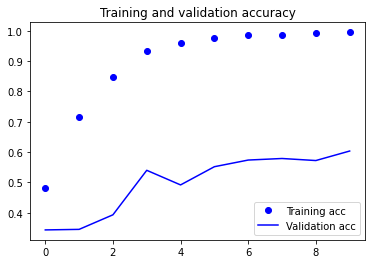

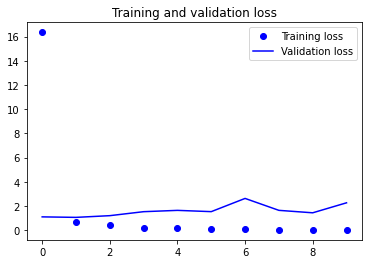

In [10]:
# plotting performance

import matplotlib.pyplot as plt

categorical_accuracy = history.history['categorical_accuracy']
val_categorical_accuracy = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(categorical_accuracy))

plt.plot(epochs, categorical_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_categorical_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

*Note:*

*I was never able to get the NN model to not overtrain, but I left it here for reference. As the other model had better performance without issues with fitting, I focused my efforts on it instead*


## Build Convolutional Neural Network

*To be added...*

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [25]:
# creating model

cnn_model= models.Sequential()
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(512, activation='relu'))
cnn_model.add(layers.Dense(3, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['categorical_accuracy'])

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)      

In [26]:
# training model

history = cnn_model.fit_generator(
    train_generator,
    steps_per_epoch = 100, 
    epochs=7,
    validation_data = validation_generator,
    validation_steps=50,
    verbose = 1)

Epoch 1/7
100/100 [==============================] - 19s 188ms/step - loss: 1.2486 - categorical_accuracy: 0.3465 - val_loss: 1.0245 - val_categorical_accuracy: 0.4807
Epoch 2/7
100/100 [==============================] - 17s 173ms/step - loss: 0.9639 - categorical_accuracy: 0.5370 - val_loss: 0.5645 - val_categorical_accuracy: 0.9426
Epoch 3/7
100/100 [==============================] - 18s 175ms/step - loss: 0.7704 - categorical_accuracy: 0.6685 - val_loss: 0.5347 - val_categorical_accuracy: 0.8425
Epoch 4/7
100/100 [==============================] - 17s 174ms/step - loss: 0.6283 - categorical_accuracy: 0.7360 - val_loss: 0.3148 - val_categorical_accuracy: 0.8637
Epoch 5/7
100/100 [==============================] - 17s 166ms/step - loss: 0.4718 - categorical_accuracy: 0.8025 - val_loss: 0.1896 - val_categorical_accuracy: 0.9426
Epoch 6/7
100/100 [==============================] - 18s 181ms/step - loss: 0.4237 - categorical_accuracy: 0.8310 - val_loss: 0.1261 - val_categorical_accuracy:

In [24]:
cnn_model=0

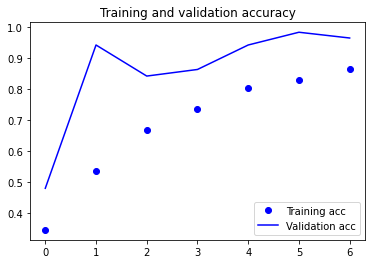

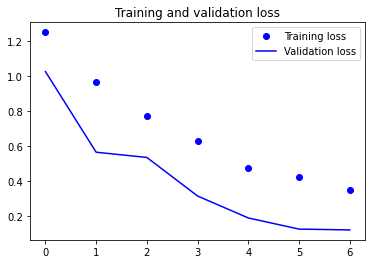

In [27]:
# plotting performance

import matplotlib.pyplot as plt

categorical_accuracy = history.history['categorical_accuracy']
val_categorical_accuracy = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(categorical_accuracy))

plt.plot(epochs, categorical_accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_categorical_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

*Note: Overfitting usually began around epoch 7*

## Using the CNN model to classify new gestures

The creator of the dataset also made a validation dataset, which can be downloaded [here](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip)

Images from this set can be uploaded to gauge the performance of the CNN model. When I ran it, it was 9/9 for the images I uploaded.


In [29]:
# predicting class from uploaded images

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = cnn_model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper2.png to paper2.png
Saving paper-hires1.png to paper-hires1.png
Saving rock7.png to rock7.png
Saving scissors4.png to scissors4.png
Saving rock6.png to rock6.png
Saving scissors1.png to scissors1.png
paper2.png
[[1. 0. 0.]]
paper-hires1.png
[[1. 0. 0.]]
rock7.png
[[0. 1. 0.]]
scissors4.png
[[0. 0. 1.]]
rock6.png
[[0. 1. 0.]]
scissors1.png
[[0. 0. 1.]]


## Conclusion

*To be added...*